# Random Geometric Graphs

### These category of graphs are random models made by building the graph based on the Euclidean distance and separation of nodes. In this case, we will be building a model by connecting all randomly scattered nodes if the distance is below a certain parameter $d$.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from collections import Counter

# Function to generate random polar coordinates
def post_gen(t):
    theta, norm = np.random.ranf() * np.pi * 2, np.random.ranf()
    x, y = np.cos(theta) * norm, np.sin(theta) * norm
    return [x, y]

def geometric_graph(n, d):
    g = nx.Graph()
    posts = list(map(post_gen, range(n)))
    
    def node_add(node):
        return (node, dict(pos = posts[node]))
    
    nodes = list(map(node_add, range(n)))
    g.add_nodes_from(nodes)
    
    def edges_add(node):
    
        def distance(target):
            dist = ((posts[node][0] - posts[target][0]) ** 2 + (posts[node][1] - posts[target][1]) ** 2)**0.5
            return dist
        
        distance = np.vectorize(distance)
        dists = distance(range(n))
        targets = np.where(dists < d)[0]
        return zip(targets, np.full(len(targets), node))
    
    edges_add = np.vectorize(edges_add)
    edges = edges_add(range(n))
    for edge in edges:
        g.add_edges_from(edge)
        
    return g


Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 173339
Average degree:  85.8326

Global clustering coefficient: 0.6088350834820783
Transitivity: 0.6871044715203384
Diameter: 23
Time taken: 22.467007160186768


C:\Users\kjkchang\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


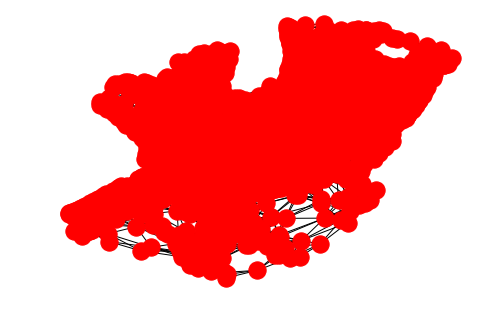

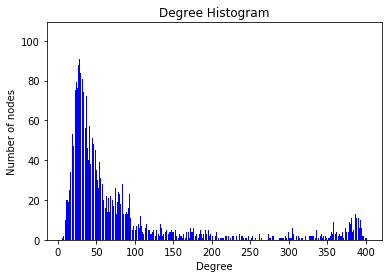

In [4]:
toc = time.time()
g = geometric_graph(4039, 0.1)
tic = time.time()
print(nx.info(g))
print(f"\nGlobal clustering coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
if nx.is_connected(g):
    print(f"Diameter: {nx.diameter(g)}")
else:
    print("Graph not connected")
print(f"Time taken: {tic-toc}")
nx.draw(g)
plt.show()
plt.clf()

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
count = Counter(degree_sequence)

plt.bar(count.keys(), count.values(), color='b')
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()
